C'est ton second checkpoint.
Les 3 exercices principaux sont indépendants. Tu peux donc les effectuer dans l'ordre que tu préfères. Ils se basent tous sur le même dataset.

Essaye de finir ce checkpoint en 4h. Si tu n'as pas tout fini, ce n'est pas grave. Tu pourras le reprendre plus tard, tu indiqueras simplement en commentaire ce que tu as fait a posteriori.
Nous t'avons indiqué des durées estimatives. Evidemment chacun a ses forces et ses faiblesses, avance donc à ton rythme. **Cependant, si tu vois que tu dépasses une durée, ne reste pas bloqué, passe à l'exercice suivant.** Tu pourras revenir à la fin sur ce que tu n'as pas fini.

Il y a deux questions bonus à la fin. Ce sont des exercices pour aller plus loin. Ils sont assez stimulants pour de l'analyse.

----------------
**ENGLISH DISCLAIMER**

This is your second checkpoint.
The 3 main exercises are independent. You can do them in the order you prefer. They are all based on the same dataset.

Try to finish this checkpoint in 4 hours. If you don't finish everything, it's not a big deal. You can do it again later, just comment on what you did afterwards.
We have given you estimated times. Obviously everyone has their own strengths and weaknesses, so go at your own pace. **However, if you see that you're going over a time limit, don't get stuck, just move on to the next exercise** You can come back to what you didn't finish at the end.

There are two bonus questions at the end. These are exercises to go further. They are quite challenging for analysis.

# Checkpoint 2
Please execute the code below

In [77]:
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [24]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np



url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_music

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


# Data exploration (approximately 1h30)

## Introduction
Display the first rows of the dataset.

In [25]:
# Your code here : 
df_music.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Describe the dataset including all types of columns (i.e. numerical and the others) and comment the column popularity.

In [26]:
# Your code here : 
df_music.describe(include = 'all')

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,232725,232725,232725,232725,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725,232725.000000,232725.000000,232725,232725.000000,232725.000000,232725,232725.000000
unique,27,14564,148615,176774,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,5,NaN
top,Comedy,Giuseppe Verdi,Home,3R73Y7X53MIQZWnKloWq5i,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,Major,NaN,NaN,4/4,NaN
freq,9681,1394,100,8,NaN,NaN,NaN,NaN,NaN,NaN,27583,NaN,NaN,151744,NaN,NaN,200760,NaN
mean,NaN,NaN,NaN,NaN,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,NaN,0.215009,-9.569885,NaN,0.120765,117.666585,NaN,0.454917
std,NaN,NaN,NaN,NaN,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,NaN,0.198273,5.998204,NaN,0.185518,30.898907,NaN,0.260065
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,NaN,0.009670,-52.457000,NaN,0.022200,30.379000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,NaN,0.097400,-11.771000,NaN,0.036700,92.959000,NaN,0.237000
50%,NaN,NaN,NaN,NaN,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,NaN,0.128000,-7.762000,NaN,0.050100,115.778000,NaN,0.444000
75%,NaN,NaN,NaN,NaN,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,NaN,0.264000,-5.501000,NaN,0.105000,139.054000,NaN,0.660000


In [27]:
#La colonne popularity est une colonne numérique. 
#Ses valeurs vont de 0 à 100 avec une moyenne à 48 et une médianne à 43. Les 3/4 des valeurs sont situés en dessous de 55.
#Elle contient 232725 valeurs tout comme le nmbre de lignes du dataset, elle ne semble donc pas contenir de NaN

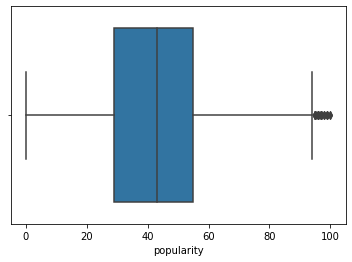

In [28]:
sns.boxplot(data = df_music, x = 'popularity')

In [29]:
#Les valeurs sont assez concentrées, avec quelques outiers dans les valeurs extrèmes

Please check the presence / absence of missing values in each column and comment your result.

In [30]:
# Your code here : 
df_music.isnull().sum()


genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [31]:
#Aucun colonne ne contient des valeurs manquantes

## Some insights about the artists

Give the number of tracks for each artist. The result will be sorted by descending order for a better readability.

*You can use `groupby`, `crosstab` or `pivot_table` to solve these questions.*


In [32]:
# Your code here : 
df_music.pivot_table(values = 'track_id', aggfunc = 'count', index = 'artist_name').sort_values(by = 'track_id', ascending = False)

,track_id
artist_name,
Giuseppe Verdi,1394
Giacomo Puccini,1137
Kimbo Children's Music,971
Nobuo Uematsu,825
Richard Wagner,804
...,...
Melanie De Biasio,1
Mel Tillis,1
Mel Levin,1



Give the mean of popularity for each artist. The result will be sorted by descending order for a better readability.
In addition, who are the 3 most popular artists ?

In [33]:
# Your code here : 
df_music.pivot_table(values = 'popularity', aggfunc = 'mean', index = 'artist_name').sort_values(by = 'popularity', ascending = False)

,popularity
artist_name,
Pedro Capó,87.0
Mario Bautista,85.0
Mau y Ricky,83.0
Kris Kross Amsterdam,82.0
Ninho,82.0
...,...
Brent Holmes,0.0
The Wayfarers,0.0
Nursery Rhymes Club,0.0


In [34]:
#The 3 most popular artists according to their mean popularity are 'Pedro Capó', 'Mario Bautista', and 'Mau y Ricky'
df_music.pivot_table(values = 'popularity', aggfunc = 'mean', index = 'artist_name').sort_values(by = 'popularity', ascending = False).head(3)

,popularity
artist_name,
Pedro Capó,87.0
Mario Bautista,85.0
Mau y Ricky,83.0


## What about Queen?
Give the track names of Queen.

In [35]:
# Your code here : 
df_queen = df_music[df_music['artist_name'] == 'Queen']
df_queen.pivot_table(index = ['artist_name','track_name'])

acousticness  ...  valence
artist_name track_name                                                 ...         
Queen       '39 - Remastered 2011                              0.0289  ...   0.3850
            A Kind Of Magic - Remastered 2011                  0.0203  ...   0.6880
            All Dead, All Dead - Remastered 2011               0.7900  ...   0.2530
            Ay-Oh - Live Aid                                   0.8810  ...   0.4620
            Bicycle Race                                       0.0742  ...   0.6900
...                                                               ...  ...      ...
            We Will Rock You - Remastered                      0.6880  ...   0.5100
            Who Wants To Live Forever - 2011 Remaster          0.5830  ...   0.0388
            Who Wants To Live Forever - Remastered 2011        0.5770  ...   0.0383
            You Don't Fool Me - Remastered 2011                0.1130  ...   0.5840
            You're My Best Friend - Remastered 2011            0.1550  ...   0.5530

[97 rows x 11 columns]

What are the mean popularity of all songs from the Queen band?

What are their 3 most popular songs?

In [36]:
# Your code here : 
df_queen['popularity'].mean()

58.79381443298969

In [37]:
df_queen.sort_values(by ='popularity', ascending = False).head(3)[['track_name', 'popularity']]

,track_name,popularity
166058,Bohemian Rhapsody - Remastered 2011,82
166059,Don't Stop Me Now - Remastered,81
166069,Somebody To Love - Remastered 2011,77


## Transform (apply ?)
Create a new column `nb_words`, with the number of words in each title (track names). It's up to you to choose if punctuation is a word or not.

In [38]:
# Your code here : 
df_music['nb_words'] = df_music['track_name'].str.split().str.len()

In [39]:
df_music[['track_name','nb_words']]

,track_name,nb_words
0,C'est beau de faire un Show,6
1,Perdu d'avance (par Gad Elmaleh),5
2,Don't Let Me Be Lonely Tonight,6
3,Dis-moi Monsieur Gordon Cooper,4
4,Ouverture,1
...,...,...
232720,Son Of Slide,3
232721,Burning Fire,2
232722,(I'm Your) Hoochie Coochie Man,5
232723,With My Words,3


## Pivot table
Let's do a pivot table with `genre` in rows, `mode` in columns and number of songs in values. 

Which genre-mode duo contains the most songs?

In [40]:
# Your code here : 
genre_mode = df_music.pivot_table(values = 'track_id', aggfunc = 'count', index = 'genre', columns= 'mode' )
genre_mode

mode,Major,Minor
genre,,
A Capella,87,32
Alternative,5877,3386
Anime,5552,3384
Blues,6415,2608
Children's Music,4708,695
Children’s Music,5977,3376
Classical,6162,3094
Comedy,6699,2982
Country,7583,1081


In [41]:
value_max = max(genre_mode.max())
value_max 

7583

In [42]:
genre_mode[genre_mode.isin([value_max])].stack()

genre    mode 
Country  Major    7583.0
dtype: float64

In [43]:
#The genre-mode duo : "Country/major" contains 7583 songs, the highest value

# Dataviz (approximately 1h30)

## Remember, each chart must have :
- beautiful colors
- title
- readable axis ticks
- legend

## Display a correlation heatmap
Color scale has to be **centered on 0-value**, in order to distinguish negative and positive values. Please choose a beautiful **diverging palette**, and remember to **display a title**.


[Text(0.5, 1.0, 'Correlation Heatmap')]

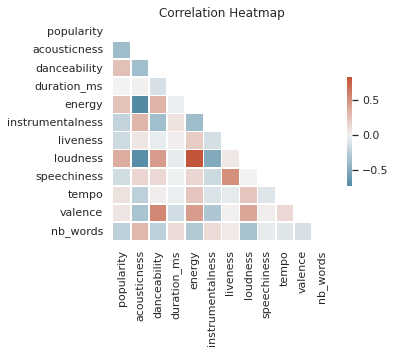

In [44]:
sns.set_theme(style="white")
corr = df_music.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Correlation Heatmap')


Some columns seem to have strong (negative) correlations between them. 
- Which ones? 
- What does it mean?

In [ ]:
# Your answers here :

#acousticness and loudness / acousticness and energy sont corrélées négativement (et par conséquent, loudness et energy sont corrélées positivement).

#Les valeurs de 'acoustiness' sont comprises entre 0 et 1: plus la valeur est proche de 1 plus il y a de chances qu'il s'agisse d'une chanson acoustique, 
#c'est à dire qui n'utilise aucun instrument électronique moderne.

#la matrice de corrélation, sous forme de heatmap nous montre que plus une chanson est acoustique, plus son énergie et intensité sont basses.
#autrement dit, plus il y a d'instruments éléctroniques modernes, plus le son est intense et énergique. 


## Find the correlation coefficient between Energy and Acousticness

In [100]:
# Your code here :
corr.loc['energy', 'acousticness']


-0.7255763647090392

## Pairplot
Only for genres Opera and Reggaeton, display a pairplot with different colors for genres (so you'll have 2 colors).

*If the dataset is too big, you can use sampling methods.*

In [45]:
# Your code here :
df_genres = df_music[(df_music['genre'] == 'Opera') | (df_music['genre'] == 'Reggaeton')]

<Figure size 432x288 with 0 Axes>

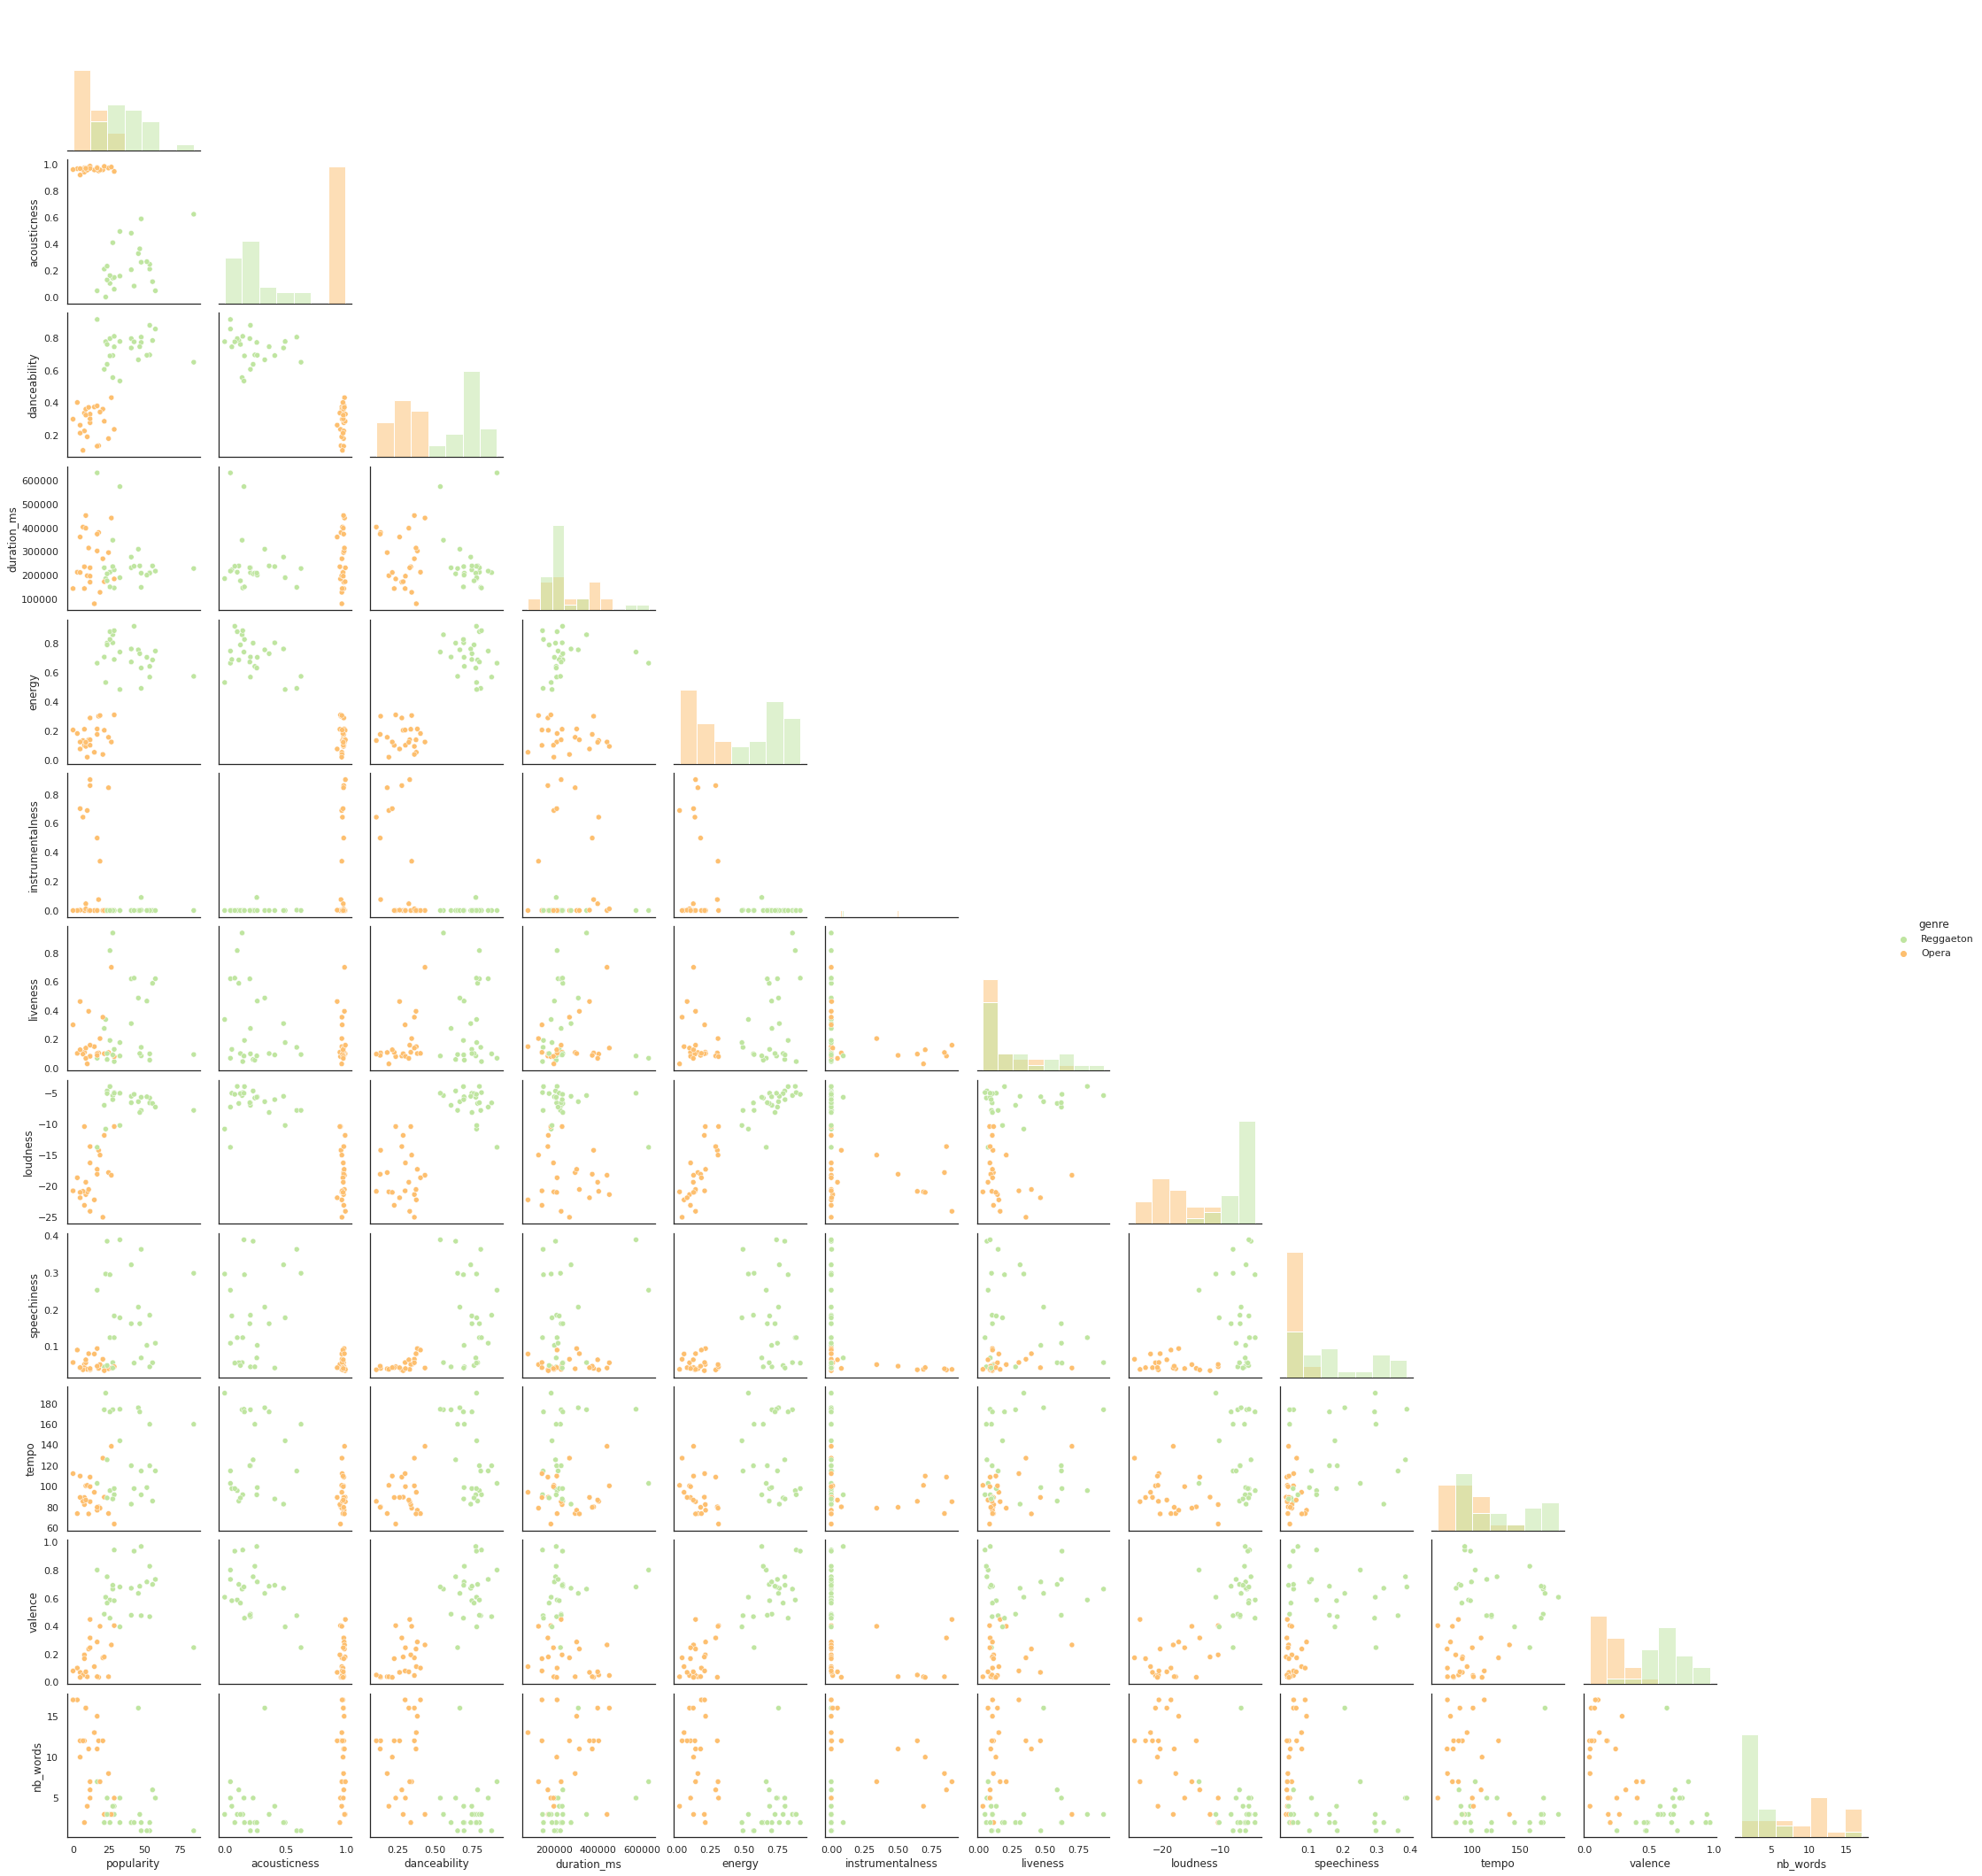

In [49]:
sns.set_theme(style="white")
fig= plt.figure()
fig.suptitle('Pairplot showing Opera and Reggaetton correlations')
sns.pairplot(df_genres.sample(50), 
             hue = 'genre', 
             palette = 'Spectral_r', 
             diag_kind="hist", 
             corner=True)
plt.show()

## Scatterplot
Draw a scatterplot on the columns of your choice:
- Include only genres Opera and Reggaeton
- Each genre has its own color
- Please choose beautiful colors, and remember to display a title.

In [58]:
# Your code here :
fig = px.scatter(df_genres, 
           x='popularity' , 
           y = 'danceability', 
           color = 'genre', 
           color_discrete_sequence=[ "orange","lightgreen"],
           title = 'Danceability and Popularity categories' )
fig.update_yaxes(dtick = 0.1)
fig.update_xaxes(dtick = 10)
fig.show()

## Boxplot
Draw on the same figure 2 boxplots : 1 by genre.
- Boxplots have to be in vertical
- Filter only on genres Opera and Reggaeton
- Your boxplots represent danceability

Your chart must be similar to this one (without the red arrow)

![boxplot](https://raw.githubusercontent.com/murpi/wilddata/master/checkpoint2_boxplot.png)

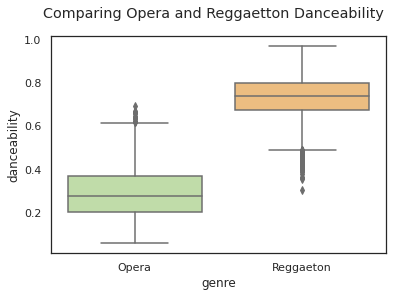

In [59]:
# Your code here :
fig = plt.figure()
fig.suptitle('Comparing Opera and Reggaetton Danceability')
sns.boxplot(data=df_genres, 
             x='genre', 
             y= 'danceability',  
             palette='Spectral_r')


How do we read it ?
- What does the horizontal line near the red arrow represent? What does it mean?

In [ ]:
# Your answer here :
# La première conclusion de ce graph est que le genre Reggaetton a des musiques beaucoup plus dançantes que l'Opéra. 
# Globalement, les notes de 'Danceability' sont assez condensées pour les 2 genres :
# la moitié des notes se situent entre 0,2 et 0,4 pour l'Opera et la moitié des notes se situent entre 0,7 et 0,8 environ pour le Reggaetton.
# Il existe quelques outliers dans les valeurs extrèmes pour l'Opera (certaines musiques sont beaucoup plus dançantes que la majorité des musiques d'operas)
# mais ne dépassant jaimais 0,7 : la médiane du genre reggaetton. Même conclusion a l'inverse pour le Reggeatton avec des valeurs basses extrèmes mais jamais en deça de la médiane du genre Opéra

# La ligne horizontale représente le 3ème quartile du genre Reggaetton. Cela signifie que 1/4 des notes du genre sont supérieurs à cette ligne soit 0,8



## Histogram
Draw a histogram for the distribution of "energy", only for the genre 'Country'

In [62]:
# Your code here :

px.histogram(df_music[df_music['genre'] == 'Country'], 
             x= 'energy', 
             color_discrete_sequence=["lightblue"], 
             title = 'Distrubution of Energy', 
             nbins = 10)

## Interactive chart
With plotly express, draw an interactive **histogram on energy**. 
- You'll add an animation frame on `genre`.
- Please be sure that the vertical scale is appropriate. Histograms should not "stick out" vertically, regardless of the `genre`.
- Don't forget the title.

In [67]:
# Your code here :

fig = px.histogram(df_music, 
                 x= "energy",
                 color = 'genre' ,
                 animation_frame='genre',
                 title = 'Level of energy in the different musical genres')
fig.update_yaxes(range=[0,1200])
fig.show()


Output hidden; open in https://colab.research.google.com to view.

# Machine Learning : Classification (approximately 1h30)

Train a classification model that predicts the genre between Opera and Reggaeton of a track with wichever columns you want. You can try different algorithms.

Try to get the best accuracy score on your test set!!! (without overfitting)

Please display a confusion matrix as well.

In [68]:
# Your code here:
df_opera_reggaeton = df_music.loc[df_music["genre"].isin(["Opera", "Reggaeton"])]
df_opera_reggaeton


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,nb_words
57582,Opera,Charles Gounod,Ave Maria,2kyEgPaAW8wdpvevPnkf0Z,62,0.9930,0.1320,163267,0.0195,0.888000,C,0.0569,-29.760,Major,0.0445,81.616,3/4,0.1400,2
57583,Opera,Richard Wagner,Tannhäuser: Overture,1U1i1HBJ5H8DY5J4fO8ySg,58,0.8310,0.0843,853827,0.1820,0.926000,E,0.1970,-15.880,Major,0.0356,73.750,4/4,0.0604,2
57584,Opera,Giacomo Puccini,"""Nessun dorma!""",74WjYdm3Lvbwnds4thYPUU,63,0.9610,0.1710,180933,0.3080,0.005460,D,0.3190,-12.383,Major,0.0456,171.798,5/4,0.0889,2
57585,Opera,Gioachino Rossini,Semiramide: Overture (Live),2wG5UNal67Vkyjsdm3Ahat,2,0.8960,0.2590,746600,0.1980,0.679000,A,0.6890,-19.621,Major,0.0658,158.284,4/4,0.1590,3
57586,Opera,Gioachino Rossini,Overture (Sinfonia),1chTrqszWQEOP4RsNuOZf7,52,0.9110,0.3390,425000,0.1400,0.678000,E,0.1570,-20.598,Major,0.0470,95.975,4/4,0.2960,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166052,Reggaeton,Juhn,Burberry,6X7OHq7Fjdkl8jgJ7s2SsE,21,0.0200,0.7880,220961,0.8430,0.000000,G,0.1130,-5.417,Major,0.2410,135.874,4/4,0.4000,1
166053,Reggaeton,Musicologo Y Menes,Adicta (feat. Nicky Jam),2SNvQUgGOz7TtvTGbWUd1Z,24,0.0200,0.7730,181985,0.9200,0.000000,F#,0.1190,-4.117,Minor,0.0345,102.006,4/4,0.7590,4
166054,Reggaeton,Alex Kyza,Quien Te Dijo (REMIX) (feat. De La Ghetto),2SybcKL6xs1KizvciGmlwG,17,0.0158,0.8310,295187,0.7260,0.000011,C#,0.0823,-5.327,Minor,0.0380,96.998,4/4,0.4000,8
166055,Reggaeton,N'Klabe,Bailala Como Quieras,5morCKZwjNzpByAkdHyBQB,21,0.4450,0.7990,228573,0.8560,0.000007,A#,0.1690,-3.715,Major,0.1460,99.090,4/4,0.9430,3


In [76]:
############      PRE-PROCESSING    ############

#Définition des colonnes à utiliser dans l'algo et de la colonne cible
X = df_opera_reggaeton.select_dtypes(include='number')
y = df_opera_reggaeton['genre']

In [79]:
#Standardization 
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [80]:
#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, train_size = 0.75)

In [83]:
###########    KNN    ###########

#On cherche les meilleurs hyperparamètres
dico = {'n_neighbors' : range(1,12), 
        'weights' : ['uniform','distance']}
randoKNN = RandomizedSearchCV(KNeighborsClassifier(), dico , n_iter=200).fit(X_train, y_train)

print("best score:",randoKNN.best_score_)
print("best parameters:",randoKNN.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning:

The total space of parameters 22 is smaller than n_iter=200. Running 22 iterations. For exhaustive searches, use GridSearchCV.



best score: 0.9995350639287098
best parameters: {'weights': 'uniform', 'n_neighbors': 9}


In [84]:
#cross validation sur le jeu d'entrainement (on retrouve le même score)
cross_val_score(KNeighborsClassifier(9), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9995350639287098

In [87]:
# score sur le jeu de test pour vérifier qu'il n'y ait pas d'overfitting
modelKNN = KNeighborsClassifier(9).fit(X_train, y_train)
modelKNN.score(X_test, y_test)

0.99953509995351

In [89]:
#confusion matrix : les genres sont effectivement très bien prédits
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelKNN.predict(X_test)),
             index = modelKNN.classes_ + " actual",
             columns = modelKNN.classes_ + " predicted")

,Opera predicted,Reggaeton predicted
Opera actual,2080,0
Reggaeton actual,2,2220


In [91]:
###########    Logistic Regression    ###########

#On cherche les meilleurs hyperparamètres
dico = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
randoLR = RandomizedSearchCV(LogisticRegression(max_iter=5000), dico , n_iter=200).fit(X_train, y_train)

print("best score:",randoLR.best_score_)
print("best parameters:",randoLR.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning:

The total space of parameters 5 is smaller than n_iter=200. Running 5 iterations. For exhaustive searches, use GridSearchCV.



best score: 0.9996900426191399
best parameters: {'solver': 'newton-cg'}


In [92]:
# score sur le jeu de test pour vérifier qu'il n'y ait pas d'overfitting
modelLR = LogisticRegression(max_iter=5000, solver = 'newton-cg').fit(X_train, y_train)
modelLR.score(X_test, y_test)

0.999767549976755

In [93]:
#confusion matrix : encore mieux, au lieu de 2 erreurs on en a une seule
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelLR.predict(X_test)),
             index = modelLR.classes_ + " actual",
             columns = modelLR.classes_ + " predicted")

,Opera predicted,Reggaeton predicted
Opera actual,2080,0
Reggaeton actual,1,2221


In [ ]:
#Je ne teste pas le Decision tree car les résultats sont déjà parfait ici!

Now train with the same parameters on these 2 genres: Rap and Hip-Hop.
You should have lower score than previously, why?

In [99]:
#création du DF
df_rap_hh = df_music.loc[df_music["genre"].isin(["Rap", "Hip-Hop"])]


In [95]:
############      PRE-PROCESSING    ############

#Définition des colonnes à utiliser dans l'algo et de la colonne cible
X = df_rap_hh.select_dtypes(include='number')
y = df_rap_hh['genre']

In [96]:
#Standardization 
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [97]:
#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, train_size = 0.75)

In [98]:
####### Application du modèle ###########
modelLR = LogisticRegression(max_iter=5000, solver = 'newton-cg').fit(X_train, y_train)
print(f'score Train : {modelLR.score(X_train, y_train)}')
print(f'score Train : {modelLR.score(X_test, y_test)}')

score Train : 0.5645196113709967
score Train : 0.5721070811744386


In [100]:
#Le score est beaucoup moins bon car ces 2 genres sont très similaires donc plus difficiles à discerner

# Machine Learning : Regression (bonus question)
In this part we will try to predict the **"loudness"** of a track. 

## Univariate regression
First we will train an **univariate linear regression** model.

Find the most correlated column with **loudness**.

In [102]:
# Your code here :
corr_loudness = df_music.corr()[['loudness']].sort_values(by='loudness', ascending = False)
corr_loudness

,loudness
loudness,1.000000
energy,0.816088
danceability,0.438668
valence,0.399901
popularity,0.363011
tempo,0.228364
liveness,0.045686
speechiness,-0.002273
duration_ms,-0.047618
nb_words,-0.338822


Split your dataset into a train and test set (using 80% as train and 20% as test). 

Use a `random_state` of **1** (for reproductivity sake).

In [228]:
# Your code here :
X = df_music[['energy']]
y = df_music['loudness']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size = 0.8)


Now train your model on the train set.

In [229]:
# Your code here :
model = LinearRegression().fit(X_train, y_train)

And evaluate it on the test set. If you did everything right your score should be `0.6689508695872618`.

In [230]:
# Your code here :

print(f'score Train : {model.score(X_train, y_train)}')
print(f'score Test : {model.score(X_test, y_test)}')


score Train : 0.6652567706815302
score Test : 0.6689508695872618


In [ ]:
################################### APRES LA FIN DES 4H IMPARTIES #############################################

Visualize your data with a scatter plot (different colors for the train and the test set).

Add a lineplot of the regression.


You should get something like this. But of course, your graphic will have nicer colors, and a title!

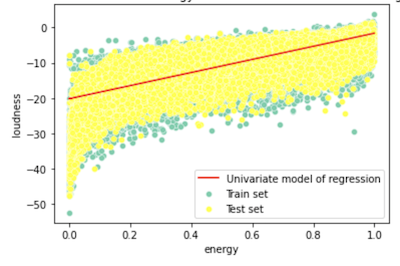

In [231]:
#On ajoute une colonne flag pour reconnaitre les données une fois qu'on aura 'merge' les DataFrames
X_train['flag'] = 'Train set'
X_test['flag'] = 'Test set'

In [232]:
#on regroupe les différentes données de train and test en un seul DF
df = pd.concat([pd.merge(X_train, y_train,left_index =True, right_index=True),
                pd.merge(X_test, y_test,left_index =True, right_index=True)])


In [233]:
df.columns

Index(['energy', 'flag', 'loudness'], dtype='object')

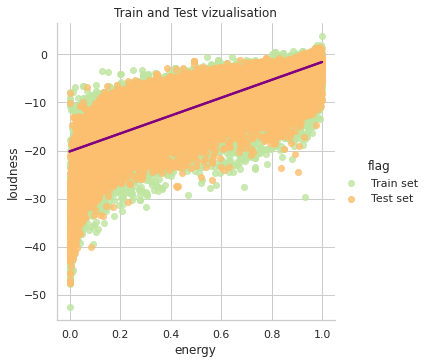

In [236]:
sns.set_theme(style ='whitegrid')

sns.lmplot(data = df,
           x='energy',
           y='loudness',
           fit_reg=True,
           hue= 'flag',
           palette = 'Spectral_r',
           line_kws = {'color' : 'purple'})

plt.title('Train and Test vizualisation')
plt.show()

Print the equation of the regression.

In [237]:
# Replace a and b by the coefficients

print(f"{model.coef_} * x + {model.intercept_}")

[18.56775242] * x + -20.171580657530956


Please predict the "**loudness**" for a an energy of 0.62

In [239]:
# Your code here :
model.predict([[0.62]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([-8.65957415])

## Multivariate regression

Now you will predict the **loudness** of a track with all the others numericals columns. 

You will do all the needed steps and keep a `random_state` of 1.

Your test score should be : `0.7650705916016727`. Is there overfitting?

In [ ]:
columns =["acousticness", "danceability", "duration_ms", "energy",
          "instrumentalness", "liveness", "popularity", "speechiness", "tempo", "valence"]


# Comparison between the top 1% popularity and the total dataset (bonus question)
Find a way to compare songs with highest popularity and the others. Something like this example, but you could be creative.

Here we've compared the frequencies by genre (35% of top-songs are "pop", versus 4% of pop songs in the total dataset)




![comparison](https://raw.githubusercontent.com/murpi/wilddata/master/checkpoint2_comparison.png)

In [ ]:
# Your code here :

